<h1>Importación de librerias</h1>

In [1]:
import os
import pandas as pd
from osgeo import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Proceso de carga de datos en formato .TIF para poder ser manipulados y visualizados</h3>
<p>Creamos vectores donde almacenar los nombres de archivos</p>

In [2]:
dir = "Raster/Berrueco_final"
ficheros=[]
nombre=[]

<p>Path de ficheros TIF para ordenarlos</p>

In [3]:
for file in os.listdir(dir):
        if file.endswith(".tif"):
            ficheros.append(os.path.join(dir, file))
            nombre.append(file.split('.')[0])

<p>Ordenamos por nombre la lista de ficheros y de nombres de ficheros<p>

In [4]:
sorted(ficheros)
sorted(nombre)

['Altitud',
 'Arcillas',
 'Arenas',
 'Carbonatos',
 'Carbono_Organico',
 'Carcavas',
 'Carcavas_2011',
 'Curvatura_Perfil',
 'Curvatura_Plana',
 'Distancia_Carreteras',
 'Factor_LS',
 'Geologia',
 'Limos',
 'Orientaciones',
 'Overland_Flow_Distance',
 'Pendiente',
 'Stream_Power_Index',
 'Topographic_Position_Index',
 'Topographic_Wetness_Index',
 'Unidades_Edaficas',
 'Usos_Del_Suelo']

<p>Creamos un Dataframe con el nombre de los TIF</p>

In [5]:
datos = pd.DataFrame(columns=nombre)

<p>Recoger tamaño de las imagenes TIF que vamos a tratar</p>

In [6]:
tif = gdal.Open(ficheros[1])
tif_band = tif.GetRasterBand(1)
x = tif_band.XSize
y = tif_band.YSize
print("Tamaño archivos cargados:",x,"x",y,"\n")

Tamaño archivos cargados: 1540 x 980 



<p>Recorremos lista de ficheros. SOLO TRATAMOS LOS DATOS NO DATA -> -1</p>

In [7]:
contador = 0
for f in ficheros:
    n = nombre[contador]
    MDT = gdal.Open(f)
    
    # Patrones sin datos se incluyen como -1
    MDT.GetRasterBand(1).SetNoDataValue(-1)
    
    # Pasamos los datos a float
    band = MDT.GetRasterBand(1).ReadAsArray().astype(float)
    
    # Se desechan las dos primeras filas y columnas debido a calculos de borde
    band = band[1:y, 1:x]
    
    # Reconstruimos el array con el tamaño de filas x columnas
    x_recorte = x - 1
    y_recorte = y - 1
    band = np.reshape(band, x_recorte*y_recorte)
    
    # Estos serán nuestros datos
    datos[n] = band
    
    contador = contador + 1

<hr>
<h3>Tratamiento de datos</h3>

In [8]:
print("Número de datos antes del tratamiento ", datos.size)

#datos = datos[datos['Carcavas_2011'] != -9999]
datos = datos[datos['Arcillas'] >= 0]
datos = datos[datos['Carbono_Organico'] >= 0]
datos = datos[datos['Orientaciones'] != -1]

print("Número de datos despues del tratamiento ", datos.size)

#datos = datos.round(4) 


# Geología
datos.loc[datos.Geologia == 9001, "Geologia"] = "Conglomerados"
datos.loc[datos.Geologia == 9004, "Geologia"] = "Arenas_fondo"
datos.loc[datos.Geologia == 9103, "Geologia"] = "Calizas_dolomias"
datos.loc[datos.Geologia == 9132, "Geologia"] = "Calcarenitas"
datos.loc[datos.Geologia == 9133, "Geologia"] = "Margas"
datos.loc[datos.Geologia == 9134, "Geologia"] = "Areniscas"
datos.loc[datos.Geologia == 9201, "Geologia"] = "Unidades_guadalquivir"
datos.loc[datos.Geologia == 9202, "Geologia"] = "Calizas_margosas"


# Unidades edáficas
datos.loc[datos.Unidades_Edaficas == 1, "Unidades_Edaficas"] = "Vertisoles_CCV"
datos.loc[datos.Unidades_Edaficas == 2, "Unidades_Edaficas"] = "Cambisoles_VVCCC"
datos.loc[datos.Unidades_Edaficas == 3, "Unidades_Edaficas"] = "Regosoles_CLCC"
datos.loc[datos.Unidades_Edaficas == 4, "Unidades_Edaficas"] = "Cambisoles_VRCVC"
datos.loc[datos.Unidades_Edaficas == 5, "Unidades_Edaficas"] = "Vertisoles_P"
datos.loc[datos.Unidades_Edaficas == 6, "Unidades_Edaficas"] = "Regosoles_CC"

# Usos del suelo
datos.loc[datos.Usos_Del_Suelo == 1, "Usos_Del_Suelo"] = "Tejido_urbano"
datos.loc[datos.Usos_Del_Suelo == 2, "Usos_Del_Suelo"] = "Olivares"
datos.loc[datos.Usos_Del_Suelo == 3, "Usos_Del_Suelo"] = "Cultivos_permanentes"
datos.loc[datos.Usos_Del_Suelo == 4, "Usos_Del_Suelo"] = "Pastizales"

Número de datos antes del tratamiento  31640301
Número de datos despues del tratamiento  31360266


<hr>
<h3>Proceso de visualización de datos</h3>

<hr>
<h3>Carcavas 2011</h3>

In [9]:
print(datos['Carcavas_2011'].value_counts())

0.0    1438002
1.0      55344
Name: Carcavas_2011, dtype: int64


<hr>
<h3>Altitud</h3>

In [10]:
print("Max: " , max(datos.Altitud))
print("Min: " , min(datos.Altitud))
print("Media: " , datos["Altitud"].mean())
print("STD: " , datos["Altitud"].std())

Max:  597.3300170898438
Min:  319.61700439453125
Media:  434.77516404119996
STD:  45.97969480393062


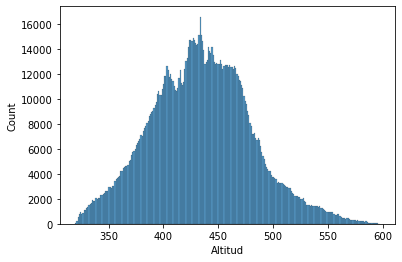

In [11]:
sns.histplot(data=datos, x="Altitud")
plt.show()

<hr>
<h3>Arcillas</h3>

In [12]:
print("Max: " , max(datos.Arcillas))
print("Min: " , min(datos.Arcillas))
print("Media: " , datos["Arcillas"].mean())
print("STD: " , datos["Arcillas"].std())

Max:  49.05451202392578
Min:  28.535688400268555
Media:  39.37702700552944
STD:  4.906099615117478


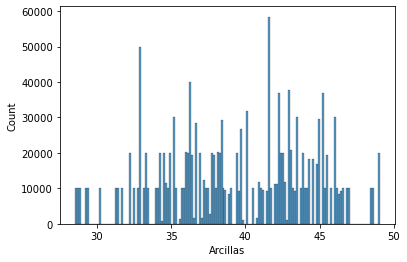

In [13]:
sns.histplot(data=datos, x="Arcillas")
plt.show()

<hr>
<h3>Arenas</h3>

In [14]:
print("Max: " , max(datos.Arenas))
print("Min: " , min(datos.Arenas))
print("Media: " , datos["Arenas"].mean())
print("STD: " , datos["Arenas"].std())

Max:  28.291458129882812
Min:  4.720367431640625
Media:  16.547807487011855
STD:  4.480991732451765


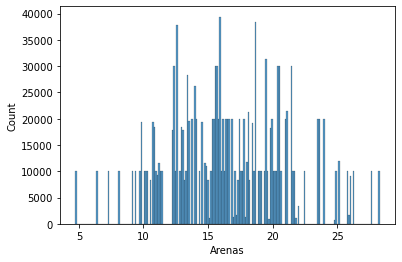

In [15]:
sns.histplot(data=datos, x="Arenas")
plt.show()

<hr>
<h3>Carbonatos</h3>

3.0    1435929
4.0      57417
Name: Carbonatos, dtype: int64


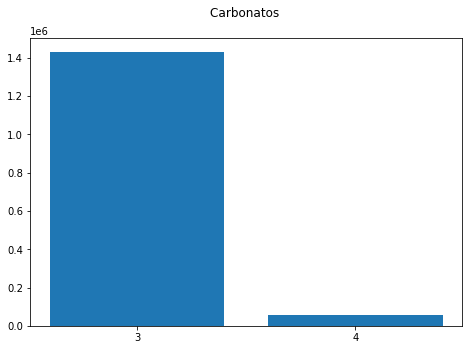

In [16]:
print(datos['Carbonatos'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
langs = ['3','4']
valores = [1432314, 56749]
ax.bar(langs, valores)
plt.title('Carbonatos \n')
plt.show()

In [17]:
print("Max: " , max(datos.Carbonatos))
print("Min: " , min(datos.Carbonatos))
print("Media: " , datos["Carbonatos"].mean())
print("STD: " , datos["Carbonatos"].std())

Max:  4.0
Min:  3.0
Media:  3.0384485578024116
STD:  0.1922766001413326


<hr>
<h3>Carbono orgánico</h3>

In [18]:
print("Max: " , max(datos.Carbono_Organico))
print("Min: " , min(datos.Carbono_Organico))
print("Media: " , datos["Carbono_Organico"].mean())
print("STD: " , datos["Carbono_Organico"].std())

Max:  23.341819763183594
Min:  10.977751731872559
Media:  12.312014634015057
STD:  1.3025311568773101


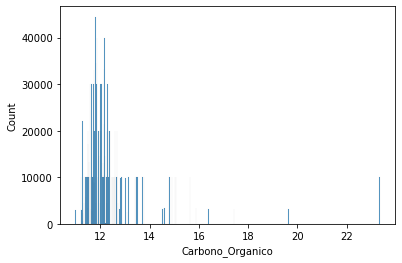

In [19]:
sns.histplot(data=datos, x="Carbono_Organico")
plt.show()

<hr>
<h3>Cárcavas</h3>

0.0    1465947
1.0      27399
Name: Carcavas, dtype: int64


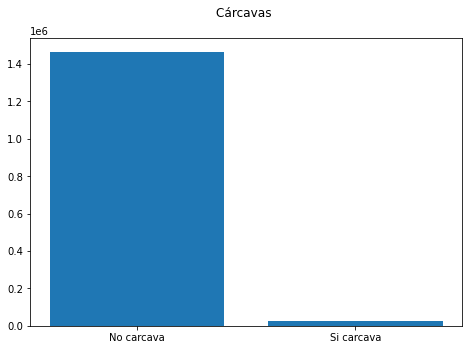

In [20]:
print(datos['Carcavas'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
langs = ['No carcava','Si carcava']
valores = [1466008, 27399]
ax.bar(langs, valores)
plt.title('Cárcavas \n')
plt.show()

<hr>
<h3>Curvatura perfil</h3>

In [21]:
print("Max: " , max(datos.Curvatura_Perfil))
print("Min: " , min(datos.Curvatura_Perfil))
print("Media: " , datos["Curvatura_Perfil"].mean())
print("STD: " , datos["Curvatura_Perfil"].std())

Max:  41.293548583984375
Min:  -34.95369338989258
Media:  0.017831996237955693
STD:  1.5901370913563688


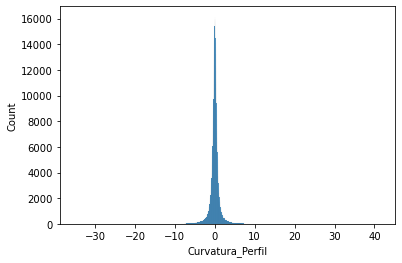

In [22]:
sns.histplot(data=datos, x="Curvatura_Perfil")
plt.show()

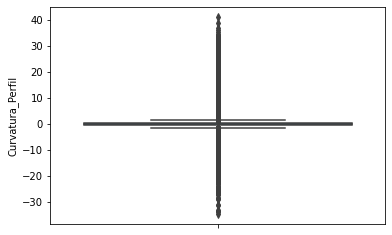

In [23]:
sns.boxplot( y=datos["Curvatura_Perfil"] );
plt.show()

<hr>
<h3>Curvatura plana</h3>

In [24]:
print("Max: " , max(datos.Curvatura_Plana))
print("Min: " , min(datos.Curvatura_Plana))
print("Media: " , datos["Curvatura_Plana"].mean())
print("STD: " , datos["Curvatura_Plana"].std())

Max:  50.11104965209961
Min:  -38.32905197143555
Media:  0.01897533592962375
STD:  1.3123847421386992


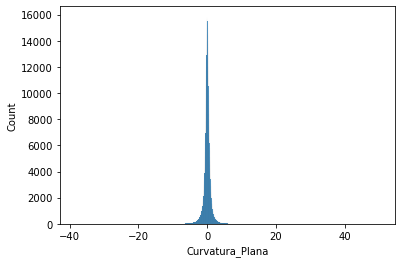

In [25]:
sns.histplot(data=datos, x="Curvatura_Plana")
plt.show()

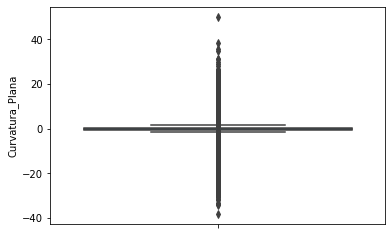

In [26]:
sns.boxplot( y=datos["Curvatura_Plana"] );
plt.show()

<hr>
<h3>Distancia carreteras</h3>

In [27]:
print("Max: " , max(datos.Distancia_Carreteras))
print("Min: " , min(datos.Distancia_Carreteras))
print("Media: " , datos["Distancia_Carreteras"].mean())
print("STD: " , datos["Distancia_Carreteras"].std())

Max:  3142.455322265625
Min:  0.0
Media:  703.9405103329719
STD:  607.4273763653437


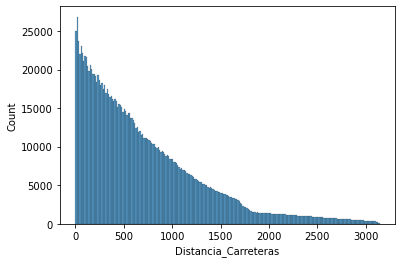

In [28]:
sns.histplot(data=datos, x="Distancia_Carreteras")
plt.show()

<hr>
<h3>Factor LS</h3>

<hr>
<h3>Geología</h3>


Unidades_guadalquivir    834587
Margas                   442916
Calizas_margosas          82445
Arenas_fondo              55136
Areniscas                 30833
Calizas_dolomias          28723
Conglomerados             15713
Calcarenitas               2993
Name: Geologia, dtype: int64


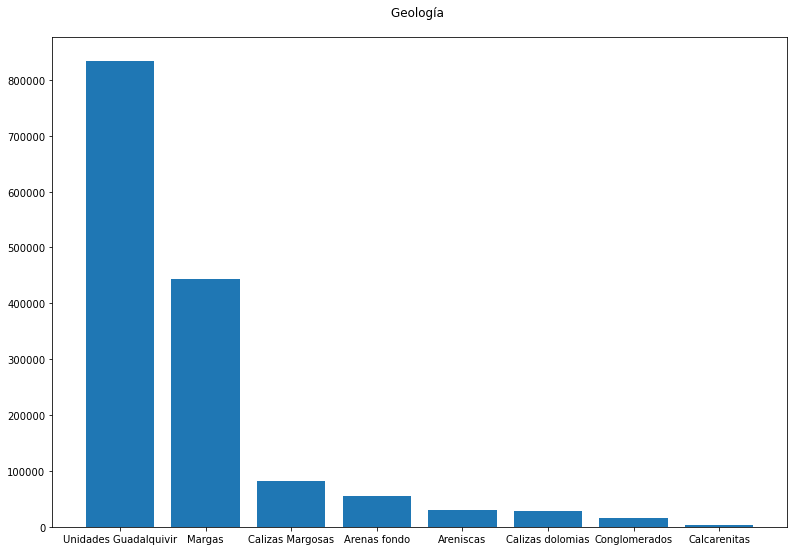

In [29]:
print(datos['Geologia'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1.7,1.7])
langs = ['Unidades Guadalquivir','Margas', 'Calizas Margosas', 'Arenas fondo', 'Areniscas', 'Calizas dolomias',
        'Conglomerados', 'Calcarenitas']
valores = [datos['Geologia'].value_counts().Unidades_guadalquivir, datos['Geologia'].value_counts().Margas,
          datos['Geologia'].value_counts().Calizas_margosas, datos['Geologia'].value_counts().Arenas_fondo,
          datos['Geologia'].value_counts().Areniscas, datos['Geologia'].value_counts().Calizas_dolomias,
          datos['Geologia'].value_counts().Conglomerados, datos['Geologia'].value_counts().Calcarenitas]
ax.bar(langs, valores)
plt.title('Geología \n')
plt.show()

<hr>
<h3>Limos</h3>

In [30]:
print("Max: " , max(datos.Limos))
print("Min: " , min(datos.Limos))
print("Media: " , datos["Limos"].mean())
print("STD: " , datos["Limos"].std())

Max:  53.689239501953125
Min:  33.2447509765625
Media:  44.075165515939524
STD:  3.6915966564238127


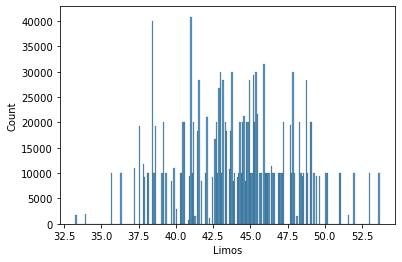

In [31]:
sns.histplot(data=datos, x="Limos")
plt.show()

<hr>
<h3>Orientaciones</h3>

In [32]:
print("Max: " , max(datos.Orientaciones))
print("Min: " , min(datos.Orientaciones))
print("Media: " , datos["Orientaciones"].mean())
print("STD: " , datos["Orientaciones"].std())

Max:  359.9998474121094
Min:  0.0
Media:  178.87056161203617
STD:  108.55349281615513


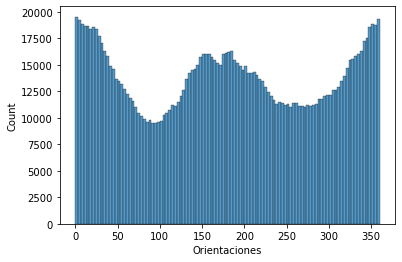

In [33]:
sns.histplot(data=datos, x="Orientaciones")
plt.show()

<hr>
<h3>Overland_Flow_Distance</h3>


In [34]:
print("Max: " , max(datos.Overland_Flow_Distance))
print("Min: " , min(datos.Overland_Flow_Distance))
print("Media: " , datos["Overland_Flow_Distance"].mean())
print("STD: " , datos["Overland_Flow_Distance"].std())

Max:  5951.634765625
Min:  0.0
Media:  1875.1979041162178
STD:  1295.1616853554115


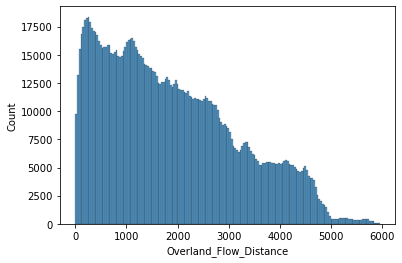

In [35]:
sns.histplot(data=datos, x="Overland_Flow_Distance")
plt.show()

<hr>
<h3>Pendiente</h3>

In [36]:
print("Max: " , max(datos.Pendiente))
print("Min: " , min(datos.Pendiente))
print("Media: " , datos["Pendiente"].mean())
print("STD: " , datos["Pendiente"].std())

Max:  55.544185638427734
Min:  0.002040053950622678
Media:  9.211973918621403
STD:  5.706223189656169


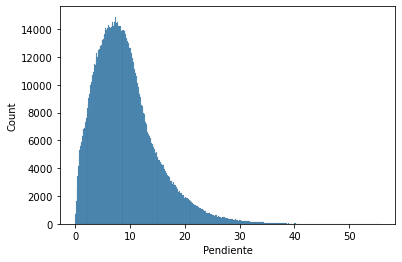

In [37]:
sns.histplot(data=datos, x="Pendiente")
plt.show()

<hr>
<h3>Stream_Power_Index</h3>

In [38]:
print("Max: " , max(datos.Stream_Power_Index))
print("Min: " , min(datos.Stream_Power_Index))
print("Media: " , datos["Stream_Power_Index"].mean())
print("STD: " , datos["Stream_Power_Index"].std())

Max:  5080776704.0
Min:  -5917084672.0
Media:  11196.018162694201
STD:  8690229.612201879


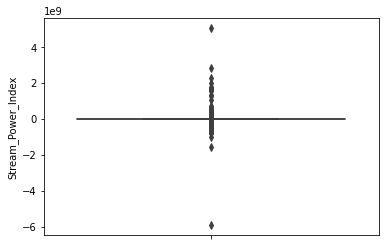

In [39]:
sns.boxplot(y=datos["Stream_Power_Index"] )
plt.show()

<hr>
<h3>Topographic_Position_Index</h3>

In [40]:
print("Max: " , max(datos.Topographic_Position_Index))
print("Min: " , min(datos.Topographic_Position_Index))
print("Media: " , datos["Topographic_Position_Index"].mean())
print("STD: " , datos["Topographic_Position_Index"].std())

Max:  22.681211471557617
Min:  -22.029876708984375
Media:  0.0012178423492327983
STD:  3.3229068676200226


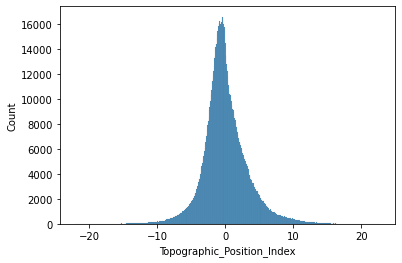

In [41]:
sns.histplot(data=datos, x="Topographic_Position_Index")
plt.show()

<hr>
<h3>Topographic_Wetness_Index</h3>

In [42]:
print("Max: " , max(datos.Topographic_Wetness_Index))
print("Min: " , min(datos.Topographic_Wetness_Index))
print("Media: " , datos["Topographic_Wetness_Index"].mean())
print("STD: " , datos["Topographic_Wetness_Index"].std())

Max:  23.729032516479492
Min:  -9.109371185302734
Media:  9.53994230980977
STD:  3.8788386254336387


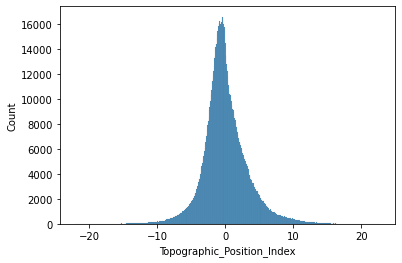

In [43]:
sns.histplot(data=datos, x="Topographic_Position_Index")
plt.show()

<hr>
<h3>Unidades edáficas</h3>

Regosoles_CC        959802
Regosoles_CLCC      253984
Vertisoles_CCV      132713
Cambisoles_VRCVC     75552
Vertisoles_P         45161
Cambisoles_VVCCC     26134
Name: Unidades_Edaficas, dtype: int64


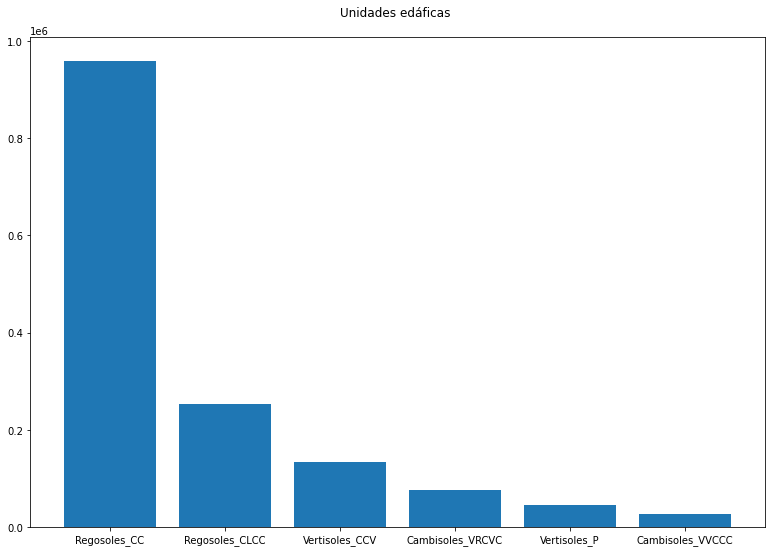

In [44]:
print(datos['Unidades_Edaficas'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1.7,1.7])
langs = ['Regosoles_CC','Regosoles_CLCC', 'Vertisoles_CCV', 'Cambisoles_VRCVC', 'Vertisoles_P', 'Cambisoles_VVCCC']
valores = [datos['Unidades_Edaficas'].value_counts().Regosoles_CC, datos['Unidades_Edaficas'].value_counts().Regosoles_CLCC,
          datos['Unidades_Edaficas'].value_counts().Vertisoles_CCV, datos['Unidades_Edaficas'].value_counts().Cambisoles_VRCVC,
          datos['Unidades_Edaficas'].value_counts().Vertisoles_P, datos['Unidades_Edaficas'].value_counts().Cambisoles_VVCCC]
ax.bar(langs, valores)
plt.title('Unidades edáficas \n')
plt.show()

<hr>
<h3>Usos del suelo</h3>


Olivares                1431680
Cultivos_permanentes      43750
Tejido_urbano             11894
Pastizales                 6022
Name: Usos_Del_Suelo, dtype: int64


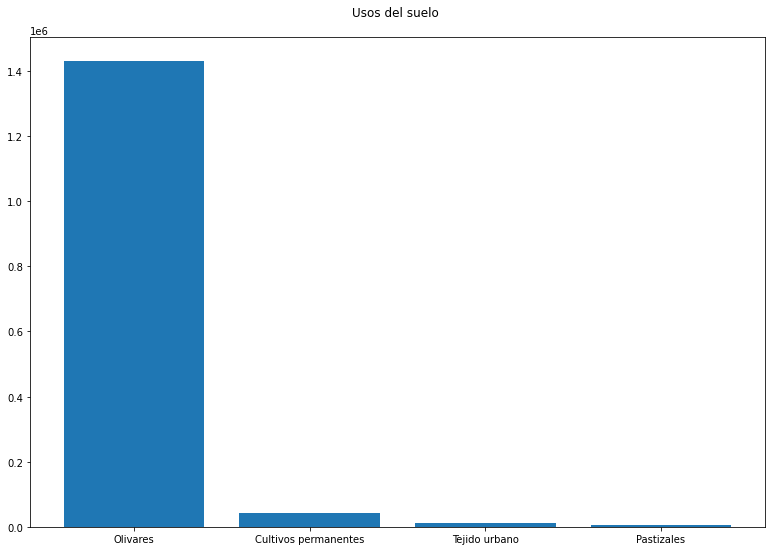

In [45]:
print(datos['Usos_Del_Suelo'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1.7,1.7])
langs = ['Olivares','Cultivos permanentes', 'Tejido urbano', 'Pastizales']
valores = [datos['Usos_Del_Suelo'].value_counts().Olivares, datos['Usos_Del_Suelo'].value_counts().Cultivos_permanentes,
          datos['Usos_Del_Suelo'].value_counts().Tejido_urbano, datos['Usos_Del_Suelo'].value_counts().Pastizales]
ax.bar(langs, valores)
plt.title('Usos del suelo \n')
plt.show()

<hr>
<h3>Matriz de correlación de variables</h3>

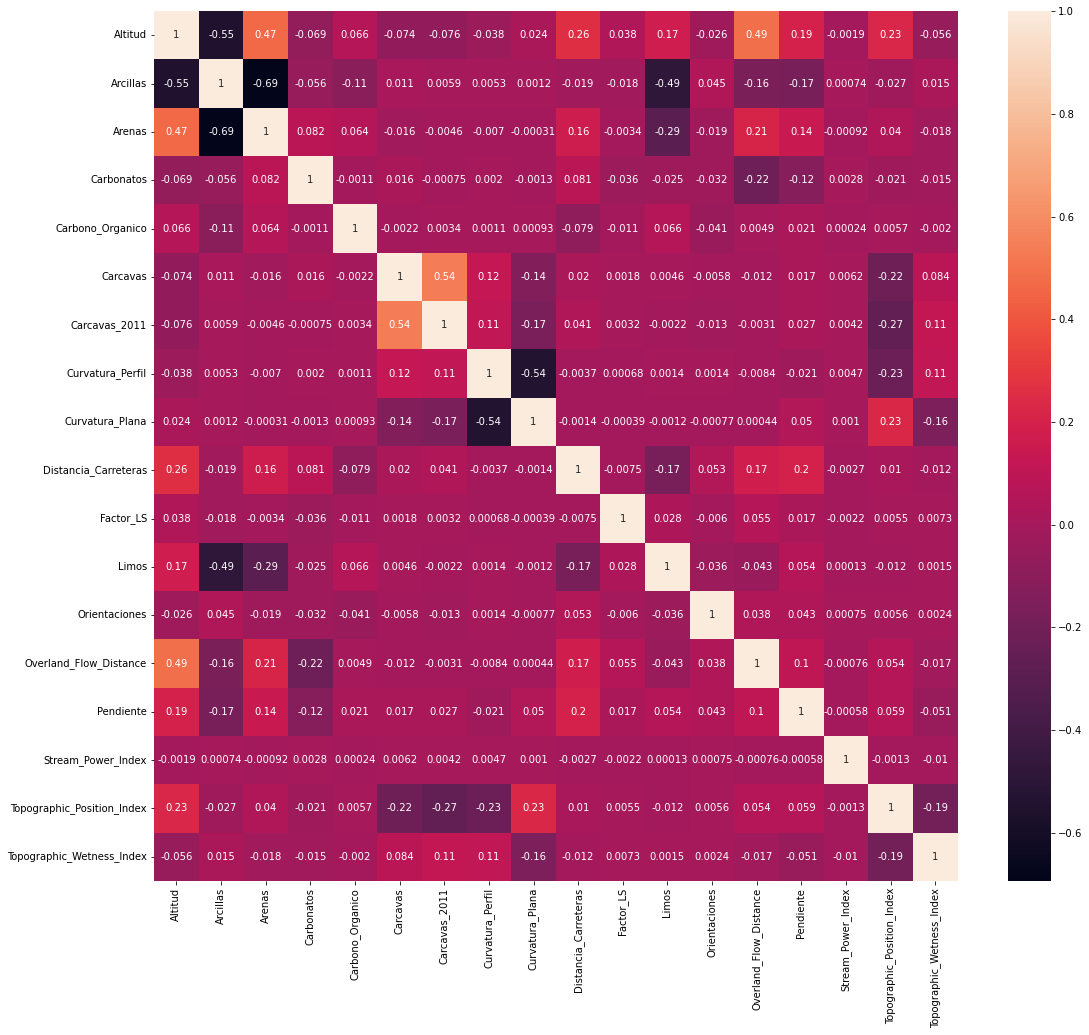

In [46]:
corr_datos = datos.corr(method='pearson')

plt.figure(figsize=(18, 16))
sns.heatmap(corr_datos, annot=True)
plt.show()